In [18]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('new 4.csv')

In [19]:
df.head()

,label,Iemg,var,Mav,Zerocrossing,Signalslopechange,Iemg.1,var.1,Mav.1,Zerocrossing.1,Signalslopechange.1
0,lat,0.738729,0.018598,0.147805,346,830,0.739068,0.267811,0.147976,1062,795
1,lat,0.734572,0.063366,0.146979,448,825,0.772712,0.337996,0.154720,1106,818
2,lat,0.741263,0.017533,0.148297,341,818,0.736951,0.447716,0.147466,1223,814
3,lat,0.747833,0.028231,0.149570,397,771,0.752744,0.346960,0.150426,1174,820
4,lat,0.749848,0.016811,0.149998,344,802,0.749610,0.348022,0.149600,1137,812


In [20]:
df.shape

(1800, 11)

In [21]:
df.label.value_counts()

Cyl      300
lat      300
palm     300
hook     300
spher    300
tip      300
Name: label, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1),df.label,test_size = 0.3
                                                   ,stratify = df.label)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
rmse_val = [] #to store rmse values for different k
KVal = []
for K in range(20,40):
    K = K+1
    model = RandomForestClassifier(max_depth = K)
    model.fit(X_train, pd.get_dummies(y_train))  #fit the model
    pred= model.predict(X_test) #make prediction on test set
    error = accuracy_score(pd.get_dummies(y_test).values.argmax(axis=1),pred.argmax(axis=1)) #calculate rmse
    rmse_val.append(error) #store rmse values
    KVal.append(K)
    print('Accuracy for k= ' , K , 'is:', error)

Accuracy for k=  21 is: 0.7222222222222222
Accuracy for k=  22 is: 0.7055555555555556
Accuracy for k=  23 is: 0.7018518518518518
Accuracy for k=  24 is: 0.6888888888888889
Accuracy for k=  25 is: 0.662962962962963
Accuracy for k=  26 is: 0.7037037037037037
Accuracy for k=  27 is: 0.674074074074074
Accuracy for k=  28 is: 0.7
Accuracy for k=  29 is: 0.725925925925926
Accuracy for k=  30 is: 0.6833333333333333
Accuracy for k=  31 is: 0.6925925925925925
Accuracy for k=  32 is: 0.6833333333333333
Accuracy for k=  33 is: 0.7
Accuracy for k=  34 is: 0.674074074074074
Accuracy for k=  35 is: 0.7055555555555556
Accuracy for k=  36 is: 0.7148148148148148
Accuracy for k=  37 is: 0.7074074074074074
Accuracy for k=  38 is: 0.725925925925926
Accuracy for k=  39 is: 0.7111111111111111
Accuracy for k=  40 is: 0.6814814814814815


In [26]:
#plotting the rmse values against k values
curve = pd.DataFrame({'K':KVal,'Accuracy':rmse_val}) #elbow curve 


In [27]:
curve.set_index(curve.K,drop=True,inplace=True)

curve.drop('K',inplace=True,axis=1)

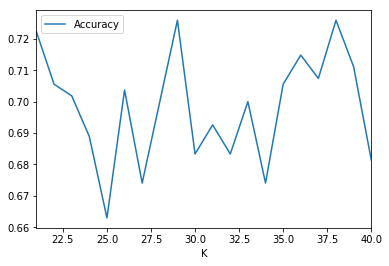

In [28]:
curve.plot.line()

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


0.49074074074074076
0.48333333333333334
0.4981481481481482
0.4962962962962963
0.5018518518518519
0.49074074074074076
0.48703703703703705
0.5203703703703704
0.5037037037037037
0.48703703703703705
0.5037037037037037
0.5092592592592593
0.4888888888888889
0.48148148148148145
0.4962962962962963
0.48333333333333334
0.4925925925925926
0.4888888888888889
0.5148148148148148
0.4888888888888889


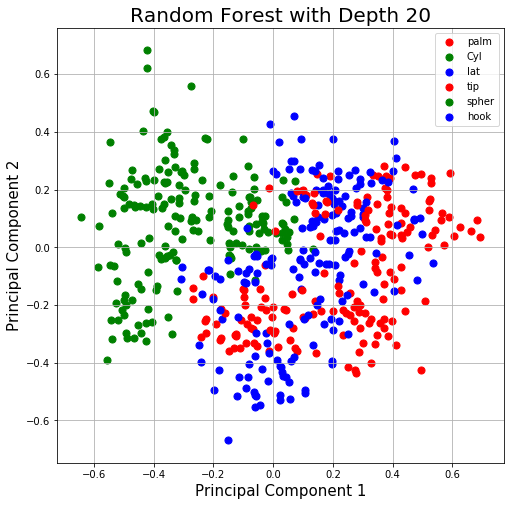

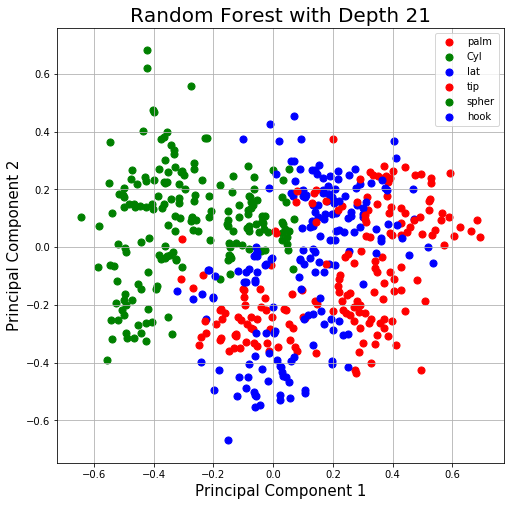

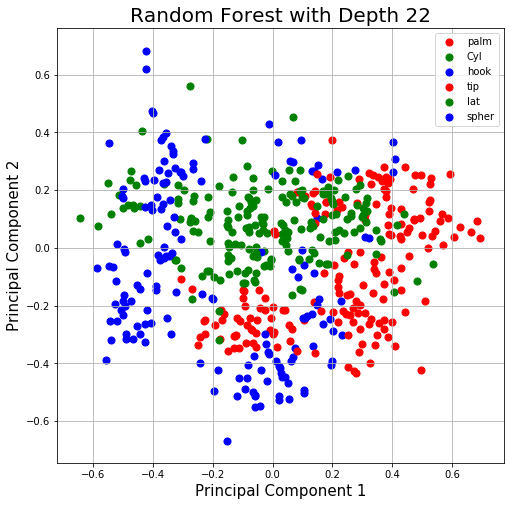

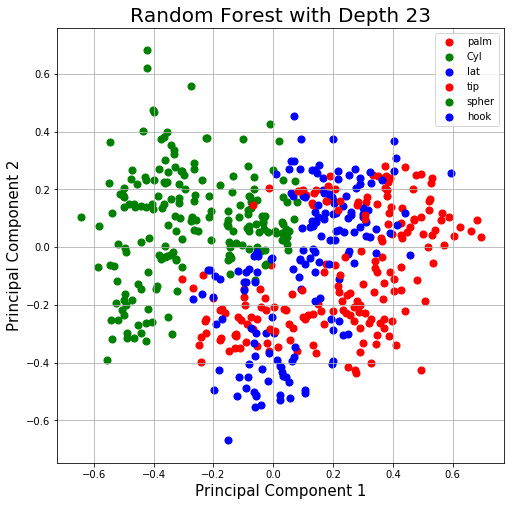

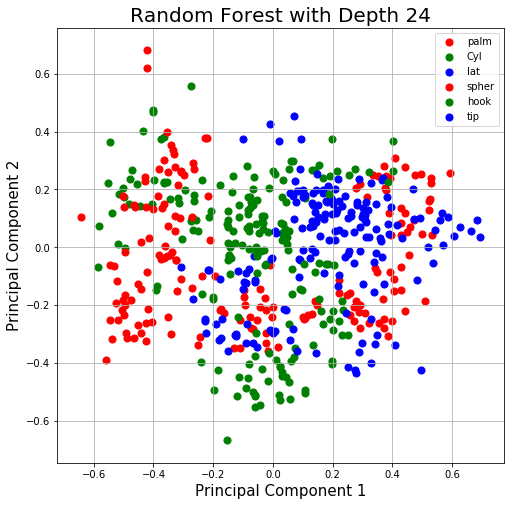

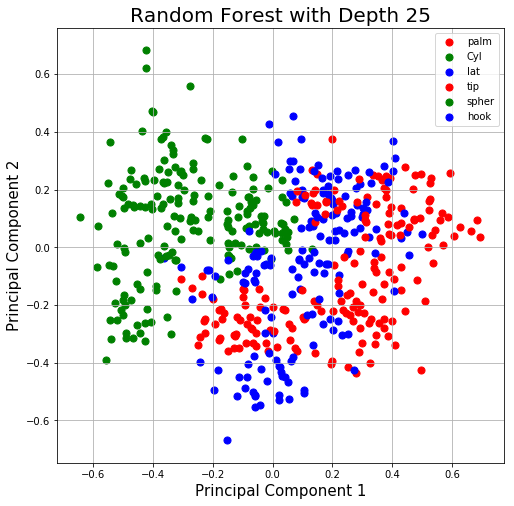

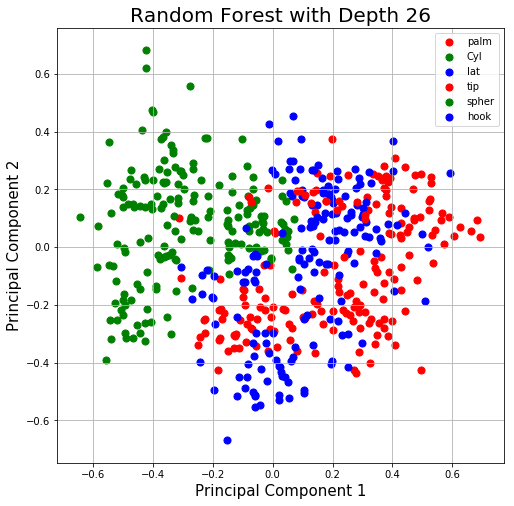

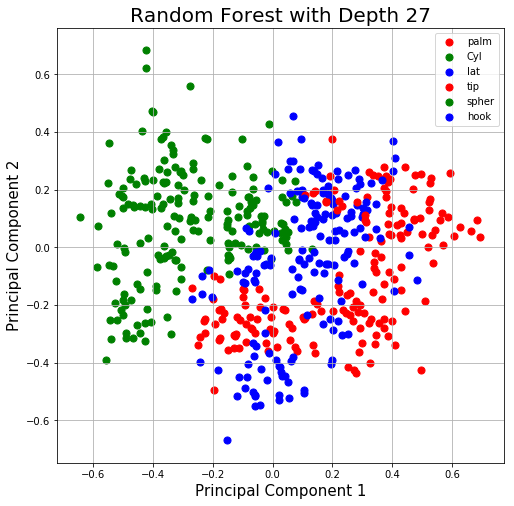

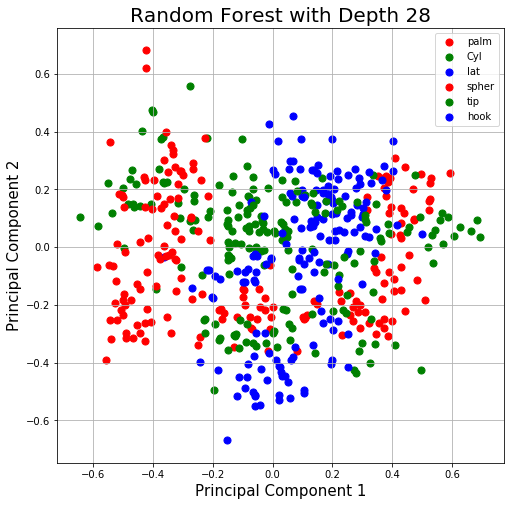

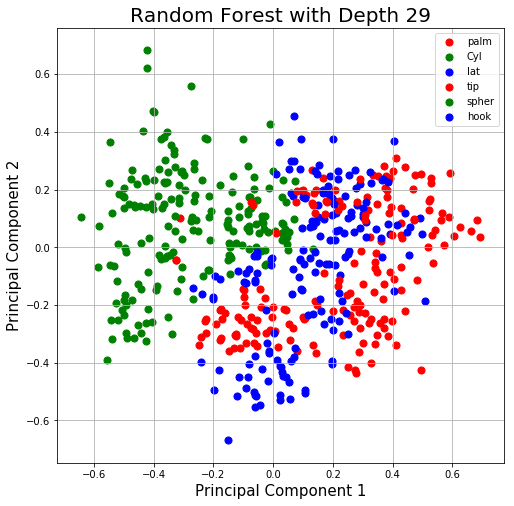

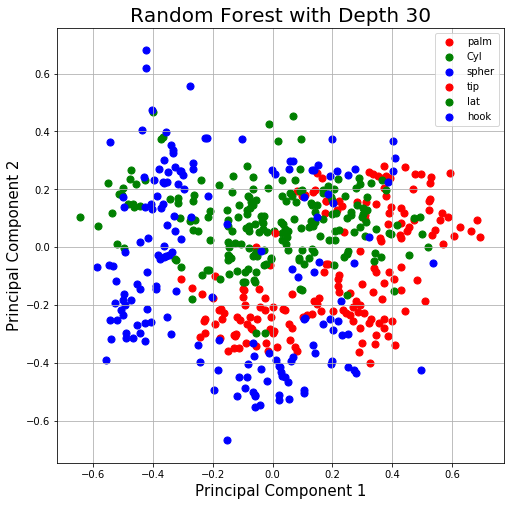

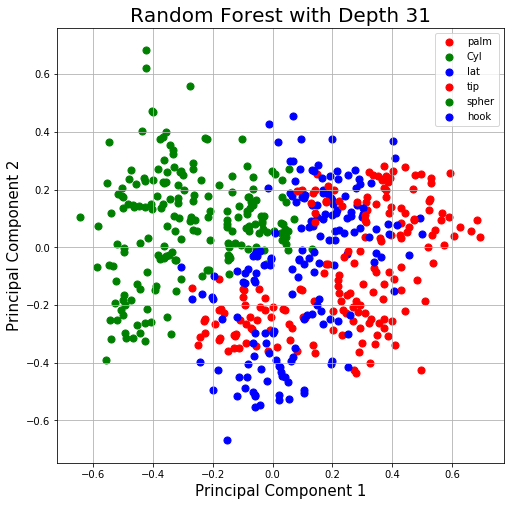

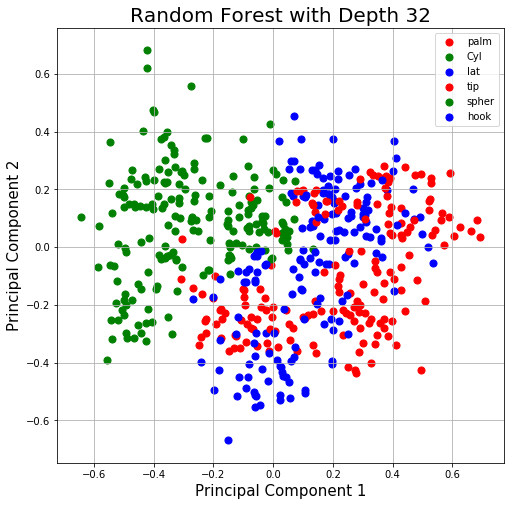

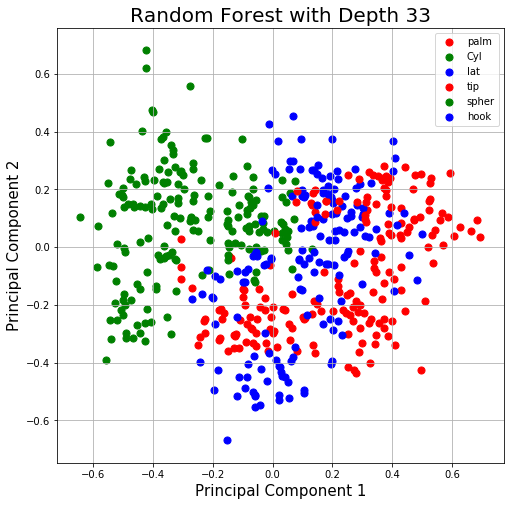

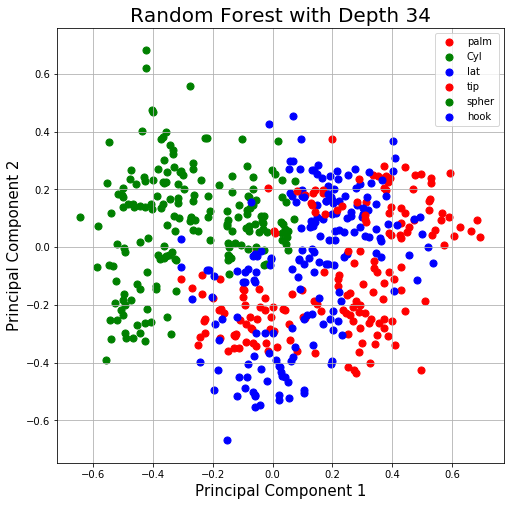

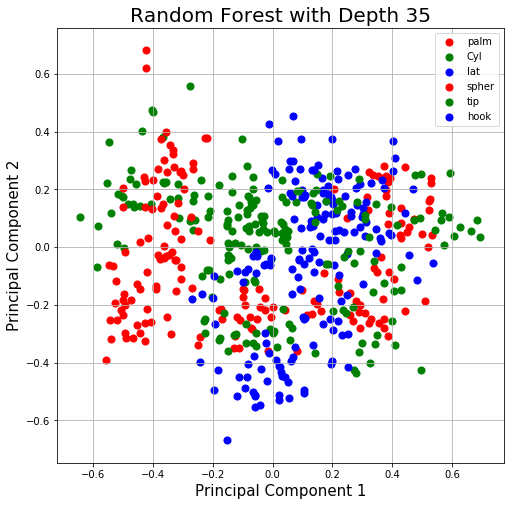

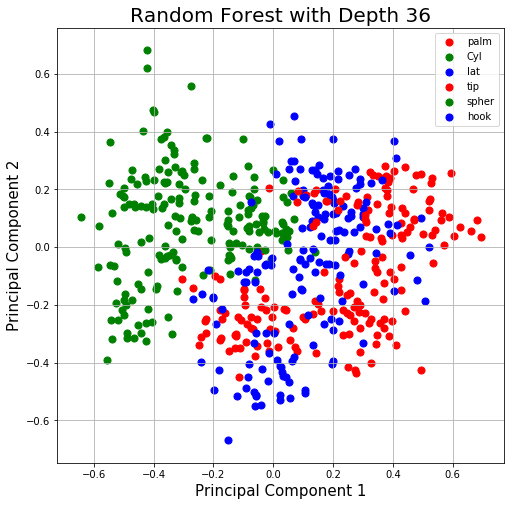

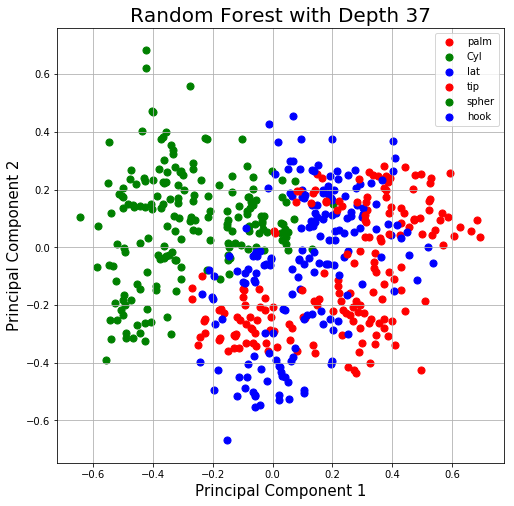

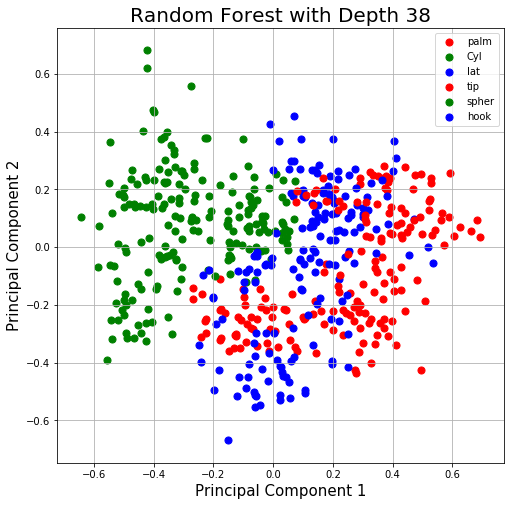

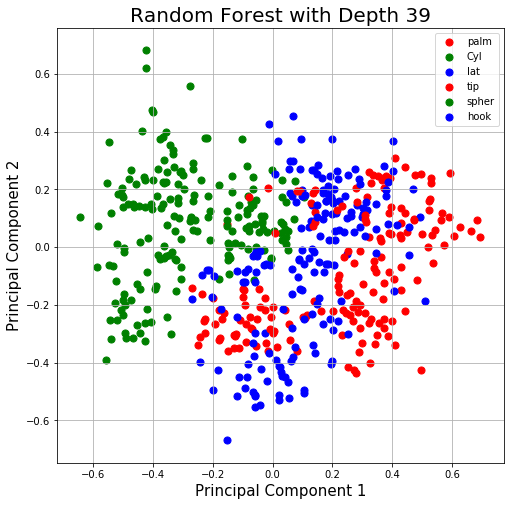

In [31]:
from sklearn.decomposition import PCA

for N in range(20,40):
    pca = PCA(n_components=2)

    X_transformed = pca.fit_transform(X_train)
    X_transformed = pd.DataFrame(X_transformed,columns=['PCA-1','PCA-2'])
    X_transformed['target'] = le.fit_transform(y_train.astype('str'))

    model = RandomForestClassifier(max_depth=N)
    model.fit(X_transformed.drop('target',axis=1),X_transformed['target'])


    X_test_transformed = pca.transform(X_test)
    X_test_transformed = pd.DataFrame(X_test_transformed,columns=['PCA-1','PCA-2'])
    X_test_transformed['target'] = model.predict(X_test_transformed).astype('int')

    print(accuracy_score(le.transform(y_test),X_test_transformed['target']))

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('Random Forest with Depth '+str(N) , fontsize = 20)
    targets = X_test_transformed.target.unique()
    targets = le.inverse_transform(targets)
    colors = ['r', 'g', 'b','r','g','b']
    for target, color in zip(targets,colors):
        indicesToKeep = le.inverse_transform(X_test_transformed['target']) == target
        ax.scatter(X_test_transformed.loc[indicesToKeep, 'PCA-1']
                   , X_test_transformed.loc[indicesToKeep, 'PCA-2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    del X_transformed
    del X_test_transformed